## Check for Files

In [1]:
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'housingData-Real.csv',
 'Project Housing Dataset.ipynb',
 'Revised Housing Dataset.ipynb']

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

In [4]:
dataFrame = pd.read_csv('housingData-Real.csv')

In [5]:
dataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Separating the Columns

In [7]:
bedrooms = dataFrame['bedrooms']

In [8]:
bedrooms

0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21613, dtype: int64

In [9]:
price = dataFrame['price']

In [10]:
price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

## Convert the columns into arrays

In [13]:
# Independent Matrix X
X = np.array(bedrooms).reshape(-1, 1)

In [14]:
X

array([[3],
       [3],
       [2],
       ...,
       [2],
       [3],
       [2]], dtype=int64)

In [15]:
# Dependent Array y
y = np.array(price)

In [16]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

## Create Training and Testing Datasets

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 2/3)

In [19]:
X_train

array([[4],
       [4],
       [3],
       ...,
       [1],
       [4],
       [4]], dtype=int64)

In [20]:
y_test

array([ 415000., 1003000.,  630000., ...,  425000.,  480000.,  885000.])

## Pass Data to Train the Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_predict = regressor.predict(X_test)

In [26]:
X_test

array([[3],
       [5],
       [4],
       ...,
       [4],
       [3],
       [4]], dtype=int64)

In [27]:
y_predict

array([491614.51937864, 748205.63839749, 619910.07888806, ...,
       619910.07888806, 491614.51937864, 619910.07888806])

In [28]:
y_test

array([ 415000., 1003000.,  630000., ...,  425000.,  480000.,  885000.])

## Plotting the Results

Text(0.5, 1.0, 'Training Results')

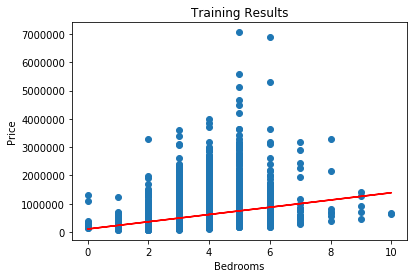

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='Red')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Training Results')

Text(0.5, 1.0, 'Training Results')

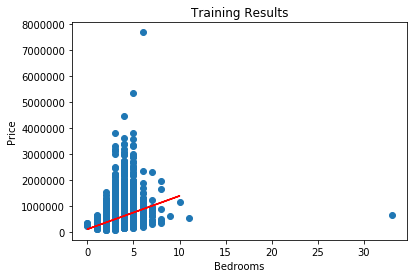

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color='Red')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Training Results')